In [1]:
import sys
sys.path.append('../src')

In [2]:
from multiprocessing import Pool
from pathlib import Path

import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

from processing.char_detection import CharDetector
from processing.plate_detection import PlateDetector


In [3]:
CASCADE_DIR_PATH = Path('../haarcascades')
CHOSEN_CASCADE = CASCADE_DIR_PATH / 'haarcascade_russian_plate_number.xml'

DATA_DIR = Path('../data/platesmania_data')

JSON_PATH = DATA_DIR / 'plates.json'
IMAGES_DIR = DATA_DIR / 'plate_images/full'

In [4]:
plates_data = pd.read_json(JSON_PATH)
plates_data.head()

full_img_file  \
0  1df377317769e3324599c30a24453ecb844058c6.jpg   
1  1e44826c869d464863921728b212611899fad40f.jpg   
2  48d7f84743de7e3ef946e3cef389beb3e08d57fe.jpg   
3  a93fa25a4129b2d711de4456327d363326c0414f.jpg   
4  7a4a7d51273d402de7598022a582a0bd4fd58476.jpg   

                                 plate_img_file       text  
0  5574ad62dd1e7969c2b8695a200c02b0cc5c94bb.jpg  BLM 11477  
1  fc93a979ee2fef580d96b26878ade1c9f79d1b8a.jpg   SRB 87NL  
2  47f8eaed2e5268518588e639cbff4a4499b02a95.jpg   NSZ 96XN  
3  e9d322298ace8b91443e7ef428e489ca0710e80f.jpg   KPR 25JX  
4  0fc91b07475960ec1fbcf5e61d98c81db168c2c7.jpg   SZ 5252A

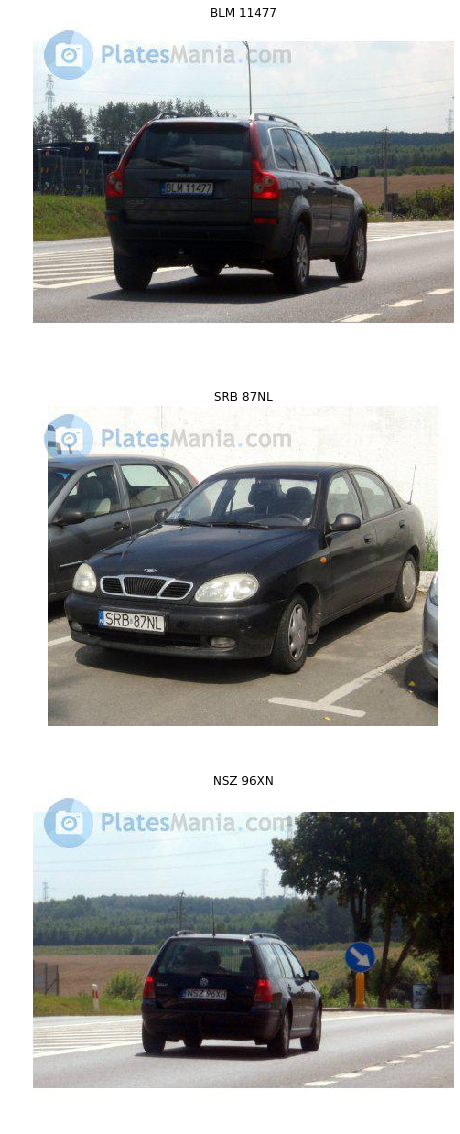

In [6]:
nb_display = 3

_, ax = plt.subplots(nrows=nb_display, figsize=(20, 20))

for i, plate in enumerate(plates_data[:nb_display].itertuples()):
    img_path = str(IMAGES_DIR / plate.full_img_file)
    
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    ax[i].imshow(img)
    ax[i].set_title(plate.text)
    ax[i].set_axis_off()

In [9]:
BASE_MIN_NEIGHBOURS = 5

plate_detector = PlateDetector(str(CHOSEN_CASCADE), BASE_MIN_NEIGHBOURS)
char_detector = CharDetector()

In [18]:
img_path = str(IMAGES_DIR / plates_data.loc[0].full_img_file)

regions, coords = plate_detector.detect(img_path)

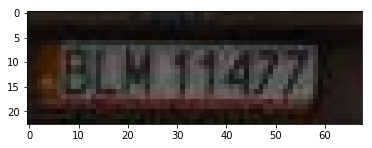

In [19]:
plt.set_cmap('gray')
plt.imshow(regions[0])